### Preliminary Analysis of the Niwot pySUMMA Model Run

Import Packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pysumma as ps
import copy
import os.path

from pysumma.plotting import plotting
from jupyterthemes import jtplot

import pandas as pd
import numpy as np
import xarray as xr

In [2]:
# Plotting assistance defaults set here
import seaborn as sns # a module that adds some plotting capabilities and makes your plots look better
import matplotlib as mpl
sns.set() # activates some of the default settings from seaborn
# The following settings just set some defaults for the plots
plt.rcParams['figure.figsize']  = (11, 4)
plt.rcParams['axes.titlesize']  = 14
plt.rcParams['axes.labelsize']  = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
mpl.rcParams['figure.dpi'] = 100

In [3]:
!pwd

/home/jovyan/work/cewa564_project/olympics/mthop/notebooks


In [5]:
# Need to change the time in the decisions file to match this simulation object 
ds = xr.open_dataset('/home/jovyan/work/cewa564_project/olympics/mthop/summa_setup/forcings/MtHopper_2016_filled.nc')
ds.time[7176] # ds.time.size is 7177 starting at 0 

<xarray.DataArray 'time' ()>
array('2016-07-26T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2016-07-26

In [4]:
# Investigating the temperature in the forcing data
forceairtemp = ds.airtemp
forceairtemp.max()
#forceairtemp.min()

<xarray.DataArray 'airtemp' ()>
array(293.145538)

In [6]:
# Investigating relative humidity in the forcing data 
ds.spechum

<xarray.DataArray 'spechum' (time: 7177, hru: 1)>
array([[0.003],
       [0.003],
       [0.003],
       ...,
       [0.003],
       [0.003],
       [0.003]])
Coordinates:
  * time     (time) datetime64[ns] 2015-10-01 2015-10-01T01:00:00 ... 2016-07-26
Dimensions without coordinates: hru

In [7]:
# Create SUMMA excecuteable and paths 
summa_executable = 'summa.exe'
case_path = '/home/jovyan/work/cewa564_project/olympics/mthop/summa_setup'
filemanager_path = os.path.join(case_path, 'file_manager.txt') 

# Create a Default Simulation Object
S = ps.Simulation(executable='summa.exe', filemanager=filemanager_path)

In [8]:
# set the simulation start and finish times
S.decisions.simulStart.set_value("2015-10-01 00:00:00")
S.decisions.simulFinsh.set_value("2016-07-26 00:00:00")

# set the stomatal resistance option
S.decisions.stomResist.set_value('BallBerry')

# add the canopyWat & others to the output simulation object
S.output_control.set_option(name='scalarCanopyWat',period=1, instant=1, sum=0, mean=0, variance=0, min=0, max=0, mode=0)
S.output_control.set_option(name='scalarSnowAge',period=1, instant=1, sum=0, mean=0, variance=0, min=0, max=0, mode=0)
S.output_control.set_option(name='scalarCanopyWetFraction',period=1, instant=1, sum=0, mean=0, variance=0, min=0, max=0, mode=0)

scalarCanopyWat                      | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0
scalarSnowAge                        | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0
scalarCanopyWetFraction              | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0


In [70]:
S.decisions.stomResist.available_options

['BallBerry', 'Jarvis', 'simpleResistance', 'BallBerryFlex', 'BallBerryTest']

In [9]:
# Run the pySUMMA simulation
S.start(run_option='local', run_suffix='default')
S.monitor()

False

Text(0.5, 1.0, 'scalrCanopyWat for Olympic National Park Site')

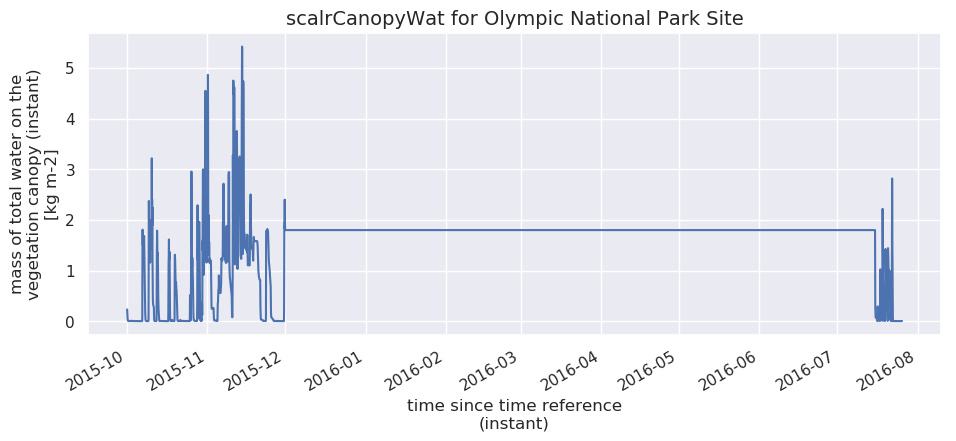

In [15]:
S.output.scalarCanopyWat.plot()
plt.title('scalrCanopyWat for Olympic National Park Site')

Text(0, 0.5, 'SWE in the Canopy [cm]')

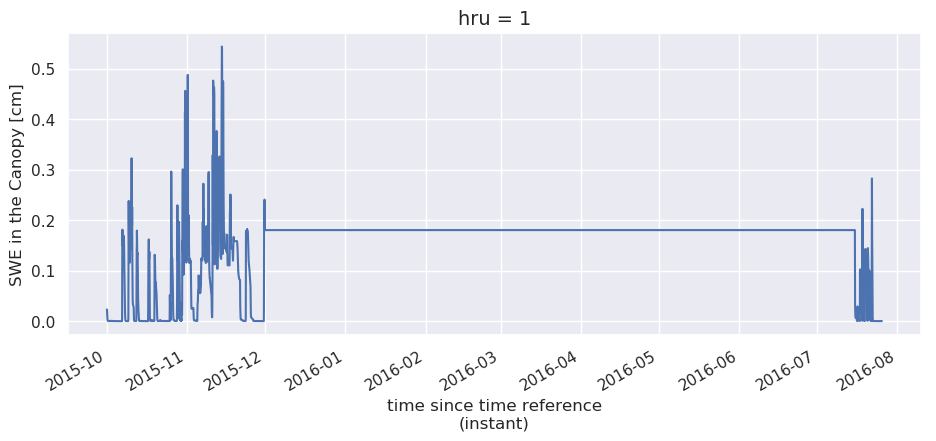

In [11]:
# Getting snow in the canopy as an ammount in [cm] using the density of water 
# density of water is 997 kg/m^3 
# our mass of total water in the canopy is kg / m^2 

canopySWE = (S.output.scalarCanopyWat/997)*100 # also, multiply by 100 to get from m to cm of SWE in canopy [cm]
canopySWE.plot()
plt.ylabel('SWE in the Canopy [cm]')

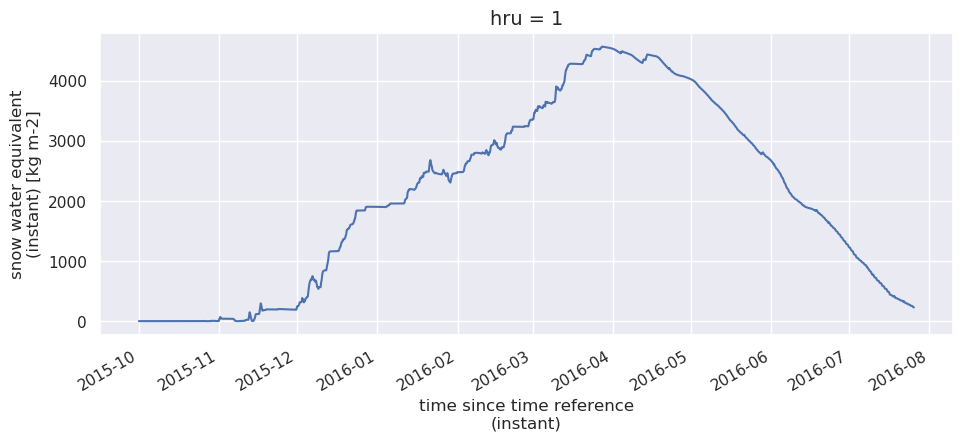

In [12]:
# Checking on the model output
S.output.scalarSWE.plot()

In [10]:
# Great, it is working now... time to create more then one simulation object with different model decisions/parameter values

# The output netCDF is currently empty... fixed it. but used this to find the error. 
#output = xr.open_dataset('/home/jovyan/work/cewa564_project/olympics/mthop/summa_setup/output/mthop_deafult_output_output_default_timestep.nc')

print('stdout:\n-------\n{}\n========\n'.format(S.stdout))
print('stderr:\n-------\n{}\n========\n'.format(S.stderr))

stdout:
-------
file_suffix is 'default'.
file_master is '/home/jovyan/work/cewa564_project/olympics/mthop/summa_setup/file_manager.txt'.
start at 20:11:17
Name of Model Output control file: /home/jovyan/work/cewa564_project/olympics/mthop/summa_setup/settings/output_control.txt
decisions file =  /home/jovyan/work/cewa564_project/olympics/mthop/summa_setup/settings/decisions.txt
   1 simulStart: 2015-10-01 00:00:00
   2 simulFinsh: 2016-07-26 00:00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: MODIFIED_IGBP_MODIS_NOAH
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: monTable
  10 f_Richards: mixdform
  11 groundwatr: qTopmodl
  12 hc_profile: pow_prof
  13 bcUpprTdyn: nrg_flux
  14 bcLowrTdyn: zeroFlux
  15 bcUpprSoiH: liq_flux
  16 bcLowrSoiH: zeroFlux
  17 veg_traits: CM_QJRMS1988
  18 rootProfil: powerLaw
  19 canopyEmis: difTrans
  20 snowIncept: lightSnow
  21 windPrfile: logBelowCanopy
  22 astability:

In [14]:
S.output.snowIncept

'lightSnow'

In [13]:
#S.output.scalarCanopyIce.plot()

In [14]:
#S.output.scalarCanopyLiq.plot()

In [51]:
#S.output.scalarCanopyWat.plot() 

In [17]:
print(S.local_param_info)

upperBoundHead            |      -7.5d-1 |      -1.0d+2 |      -1.0d-2
lowerBoundHead            |      -1.0d+1 |      -1.0d+2 |      -1.0d-2
upperBoundTheta           |       0.2004 |       0.1020 |       0.3680
lowerBoundTheta           |       0.1100 |       0.1020 |       0.3680
upperBoundTemp            |     272.1600 |     270.1600 |     280.1600
lowerBoundTemp            |     274.1600 |     270.1600 |     280.1600
tempCritRain              |     273.1600 |     272.1600 |     274.1600
tempRangeTimestep         |       2.0000 |       0.5000 |       5.0000
frozenPrecipMultip        |       1.0000 |       0.5000 |       1.5000
snowfrz_scale             |      50.0000 |      10.0000 |    1000.0000
fixedThermalCond_snow     |       0.3500 |       0.1000 |       1.0000
albedoMax                 |       0.8400 |       0.7000 |       0.9500
albedoMinWinter           |       0.5500 |       0.6000 |       1.0000
albedoMinSpring           |       0.5500 |       0.3000 |       1.0000
albedo

In [18]:
S.local_param_info.snowUnloadingCoeff.value

[0.0, 0.0, 1.5e-06]

In [25]:
S.local_param_info.refInterceptCapSnow.value

[6.6, 1.0, 10.0]

In [26]:
S.local_param_info.ratioDrip2Unloading.value

[0.4, 0.0, 1.0]

* Note from Bart's Demo code about changing parameter values. 

> **BE AWARE: as we are making these changes, we are modifying the same SUMMA configuration files. If you want to return to the original SUMMA setup, you will need to manually undo these changes (using the same functions) or you can re-install the model configuration.**

In [ ]:
# Example of changing parameter values with .set_value() which keeps everything formatted properly with pySUMMA
#S.local_param_info.zminLayer3.set_value([100.0, 0.0500, 0.0500])

#S.local_param_info.snowUnloadingCoeff.set_value(0.0, 0.0, 1.5e-06)

## Create and configure SUMMA runs with different interception parameterizations
### Things that concern us in our interception study 
First: The two interception parameterizations: 
#### - Hedstrom and Pomeroy 1998 : lightSnow
#### - Andreadis et al. 2009 : stickySnow


##### Model Decisions:
>choice of interception parameterizations  
* snowIncept: *lightSnow or stickySnow*
* refInterceptCapSnow: currently set to [6.6, 1.0, 10.0] This 

_______________________________________________________________________________________
Other Model Decisions that could be of interest: 
> choice of method for new snow density
* snowDenNew:  *hedAndPom, anderson, pahaut_76, constDens*

##### Model Parameters:
> * snowUnloadingCoeff: some values between 0 and 1 , currently [0.0, 0.0, 1.5e-06]
> * ratioDrip2Unloading: 0 to 0.4, currently [0.4, 0.0, 1.0]

In [23]:
S.decisions.snowIncept.available_options

['stickySnow', 'lightSnow']

In [26]:
S.decisions.compaction.available_options

['consettl', 'anderson']

In [40]:
S.decisions.snowDenNew.available_options

['hedAndPom', 'anderson', 'pahaut_76', 'constDens']

In [27]:
!pwd

/home/jovyan/work/cewa564_project/olympics/mthop/notebooks


### Changing the Parameter Values

In [24]:
# if you run, print(S.local_param_info), then it prints all the parameter values currently set. 
# Below are the deafult model parameter values from the local_para list 

# snowUnloadingCoeff        |       0.0000 |       0.0000 |       1.5d-6
# refInterceptCapSnow       |       6.6000 |       1.0000 |      10.0000
# ratioDrip2Unloading       |       0.4000 |       0.0000 |       1.0000
# canopyWettingFactor       |       0.7000 |       0.0000 |       1.0000
# canopyWettingExp          |       1.0000 |       0.0000 |       1.0000

# I want to keep track of the origional values because once I change them, I will have to change them back directly or reload the entire file

In [47]:
ds2 = xr.open_dataset('/home/jovyan/work/cewa564_project/olympics/mthop/summa_setup/output/mthop_deafult_output_output_default_timestep.nc')
ds2

<xarray.Dataset>
Dimensions:                    (gru: 1, hru: 1, time: 7177)
Coordinates:
  * time                       (time) datetime64[ns] 2015-10-01 ... 2016-07-26
  * hru                        (hru) int32 1
Dimensions without coordinates: gru
Data variables:
    pptrate                    (time, hru) float64 ...
    airtemp                    (time, hru) float64 ...
    SWRadAtm                   (time, hru) float64 ...
    LWRadAtm                   (time, hru) float64 ...
    hruId                      (hru) int32 ...
    averageInstantRunoff       (time, gru) float64 ...
    averageRoutedRunoff        (time, gru) float64 ...
    nSnow                      (time, hru) int32 ...
    nSoil                      (time, hru) int32 ...
    nLayers                    (time, hru) int32 ...
    scalarCanopyIce            (time, hru) float64 ...
    scalarCanopyLiq            (time, hru) float64 ...
    scalarCanairTemp           (time, hru) float64 ...
    scalarCanopyTemp           (t

#### I need to add some state/diagnostic variables to the output simulation objects
I am just going to add everything that I think would be interesting to investigate. 
* scalarCanopyWat : mass of total water on the vegetation canopy (kg m-2)
* scalarCanopyWetFraction : fraction of the canopy that is wet
* scalarSnowAge : non-dimensional snow age (-)

## Setting up the pySUMMA Simulations

In [ ]:
# We want to create a new simulation object for each run, by first creating a copy of the S simulation object 
S_simple = copy.copy(S)

# Run pySUMMA at mthop with lightSnow
S_lightSnow = copy.copy(S)
S_lightSnow.decisions.snowIncept.set_value('lightSnow')
S_lightSnow.start(run_option = 'local', run_suffix="lightSnow")
S_lightSnow.monitor()

# Run pySUMMA at mthop with stickySnow
S_stickySnow = copy.copy(S)
S_stickySnow.decisions.snowIncept.set_value('stickySnow')
S_stickySnow.start(run_option = 'local', run_suffix="stickySnow")
S_stickySnow.monitor()